In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("./supermarket_sales - Sheet1.csv")

print(data)

      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155  

In [31]:
data['Date'] = pd.to_datetime(data['Date'])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [33]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [34]:
sorted_data = data.sort_values(by="Date", ascending=True)

In [35]:
sorted_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
856,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19:31,Cash,168.96,4.761905,8.448,6.3
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55,Cash,591.66,4.761905,29.583,7.7
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,4.761905,5.408,6.9
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0


In [36]:
productLine = sorted_data["Product line"].unique()
print(productLine)

['Food and beverages' 'Fashion accessories' 'Home and lifestyle'
 'Sports and travel' 'Health and beauty' 'Electronic accessories']


In [37]:
product_line_df = pd.DataFrame(columns=np.append(productLine, 'Date'))

In [38]:
product_line_df.head()

,Food and beverages,Fashion accessories,Home and lifestyle,Sports and travel,Health and beauty,Electronic accessories,Date


In [39]:
for index, row in sorted_data.iterrows():

    if row['Date'] not in product_line_df['Date'].values:

        new_row = {'Date': row['Date']}
        for PL in productLine:
            new_row[PL] = 0

        product_line_df = pd.concat([product_line_df, pd.DataFrame([new_row])], ignore_index=True)
    

    product_line_df.loc[product_line_df['Date'] == row['Date'], row['Product line']] += 1*row['Quantity']

product_line_df.head()


/var/folders/5p/4h__g3m13mj9vb96m2zz05yc0000gn/T/ipykernel_23893/817491285.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  product_line_df = pd.concat([product_line_df, pd.DataFrame([new_row])], ignore_index=True)


,Food and beverages,Fashion accessories,Home and lifestyle,Sports and travel,Health and beauty,Electronic accessories,Date
0,18,9,8,26,2,18,2019-01-01
1,6,11,0,15,10,6,2019-01-02
2,0,0,11,1,25,0,2019-01-03
3,0,4,10,3,5,10,2019-01-04
4,1,11,22,0,14,7,2019-01-05


In [40]:
print(product_line_df)

   Food and beverages Fashion accessories Home and lifestyle  \
0                  18                   9                  8   
1                   6                  11                  0   
2                   0                   0                 11   
3                   0                   4                 10   
4                   1                  11                 22   
..                ...                 ...                ...   
84                  9                   5                  9   
85                 18                   9                  2   
86                 21                  10                  0   
87                  0                   0                  3   
88                 10                   8                  6   

   Sports and travel Health and beauty Electronic accessories       Date  
0                 26                 2                     18 2019-01-01  
1                 15                10                      6 2019-01-02  
2     

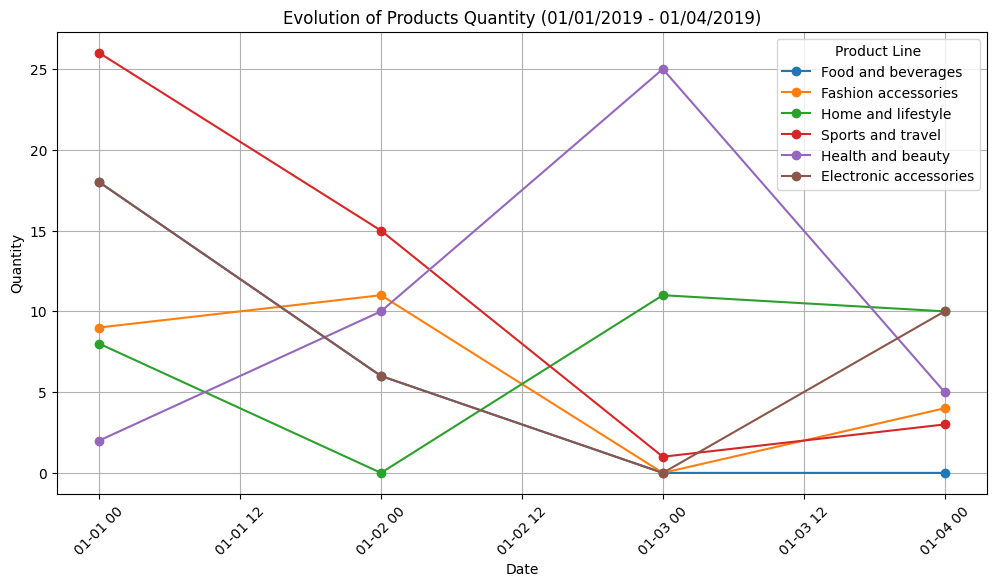

In [41]:
filtered_data = product_line_df[(product_line_df['Date'] >= '2019-01-01') & (product_line_df['Date'] <= '2019-01-04')]

plt.figure(figsize=(12, 6))
for column in filtered_data.columns:
    if column not in ['Unnamed: 0', 'Date']:
        plt.plot(filtered_data['Date'], filtered_data[column], marker='o', label=column)

plt.title('Evolution of Products Quantity (01/01/2019 - 01/04/2019)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend(title='Product Line')
plt.grid(True)
plt.show()
